In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Update Periods

Seems U16 and U32 is better (and should be faster).
Does not conincide with previous results that ~10 is a good choice.

In [23]:
file_list = ['./log/index_'+file+'.csv' for file in [
    "message_2016-6-6_2300_TQ_U16F4.log",
    "message_2016-6-7_2142_TQ_M500.log",
    "message_2016-6-7_2142_TQ_M1000.log",
    "message_2016-6-7_2142_TQ_M2000.log",
    "message_2016-6-7_2142_TQ_M4000.log",
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-6_2300_TQ_U16F4.log.csv
./log/index_message_2016-6-7_2142_TQ_M500.log.csv
./log/index_message_2016-6-7_2142_TQ_M1000.log.csv
./log/index_message_2016-6-7_2142_TQ_M2000.log.csv
./log/index_message_2016-6-7_2142_TQ_M4000.log.csv


In [24]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

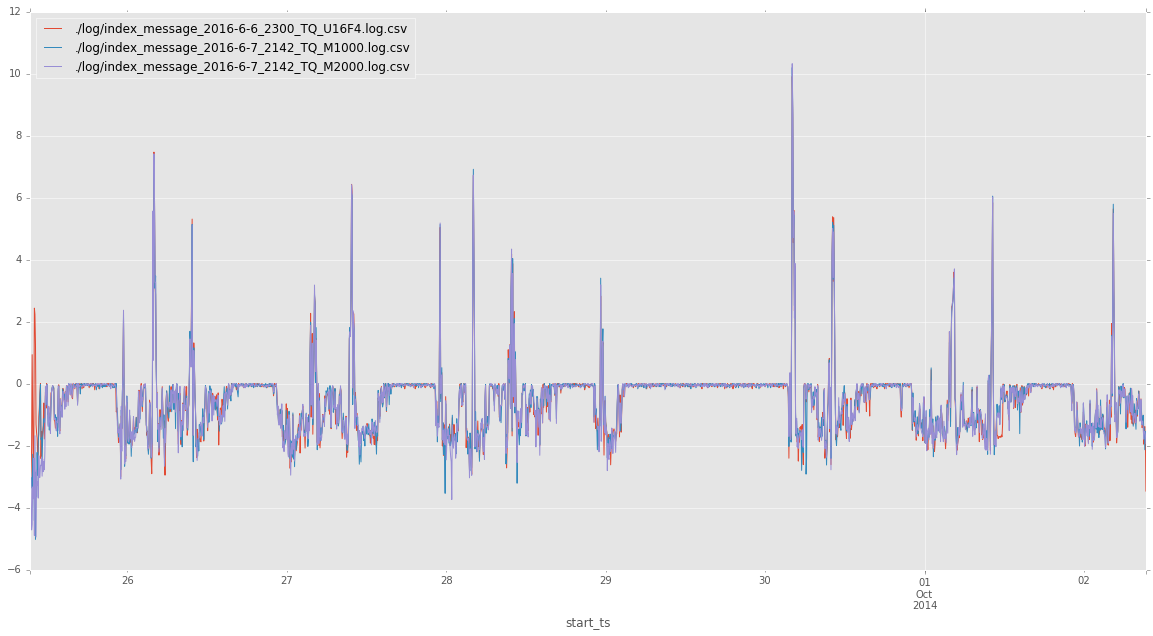

In [9]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.total_reward.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

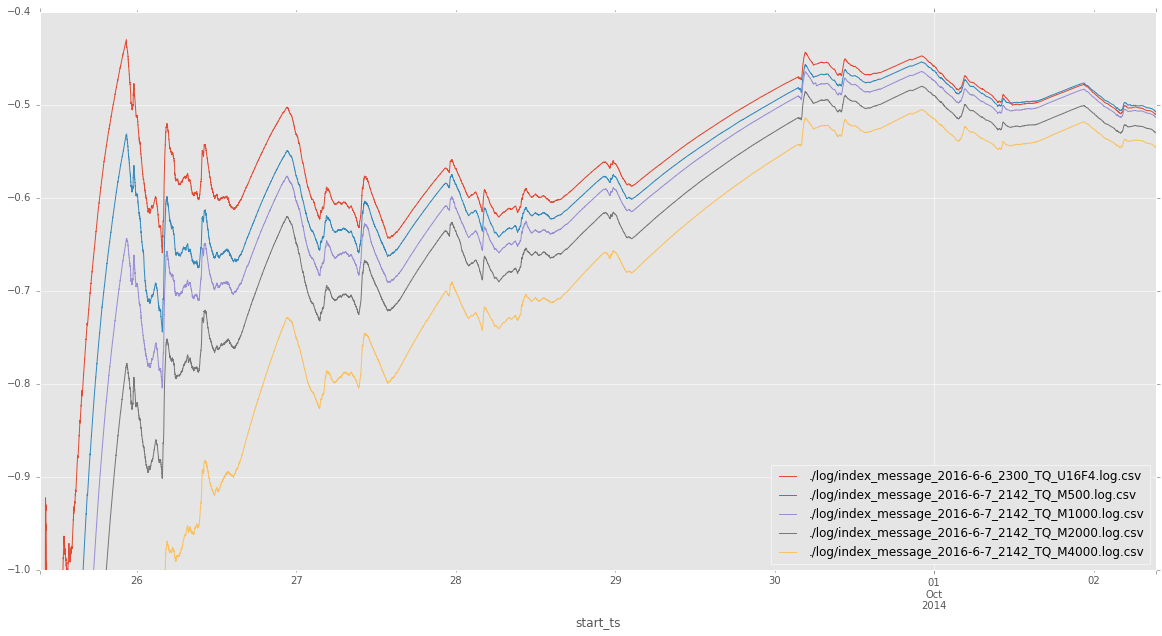

In [31]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
            ylim=(-1, -0.4),
           )